## Testcase
This test happens after the initial hdbscan hyper parameters optimization on a set of three variables, a few timeaggs, and a few lags, Dimensions have been reduced with both mean and spatcov. The ideas for the notebook are the following.
* check correctness of lagging
* check smoothness of the timeseries. Should differ over the timescales involved.
* check trends. Mean vs spatcov suffer differently?
* importance of mean vs spatcov. Dependent on size of the region?
* fit statistical models per mid-point lag vs per separation

In [1]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

HOMEDIR = Path('/scistor/ivm/jsn295/')
sys.path.append(str(HOMEDIR))
from Weave.Weave.utils import get_timeserie_properties

In [2]:
basedir = Path('/scistor/ivm/jsn295/spatcov/')
precfile = basedir / 'precursor.multiagg.parquet'
predfile = basedir / 'response.multiagg.trended.parquet'

In [3]:
precs = pd.read_parquet(precfile)
preds = pd.read_parquet(predfile)

### Making sense of the time dimension
Left lag vs separation

Only after 1981 the data is complete. Before that swvl13 from ERA5-Land misses. After selecting the lags (left stamped) make sense. The amount of missing points at the beginning within one year (from March to August) due to lagging is as expected

In [4]:
precs.loc['1981-01-01':'1981-06-06',:].isnull().sum().groupby('lag').mean()

lag
-1      1
-13    13
-20    20
-26    26
-30    30
-31    31
-36    36
-37    37
-49    49
-60    60
-7      7
dtype: int64

In [5]:
precs.columns.droplevel([0,1,-2,-1]).drop_duplicates() # Unique lag, separation combinations.

MultiIndex([( -7,  -6),
            ( -1,   0),
            (-37, -30),
            (-26, -19),
            (-13,  -6),
            ( -7,   0),
            (-60, -30),
            (-49, -19),
            (-36,  -6),
            (-30,   0),
            (-31, -30),
            (-20, -19)],
           names=['lag', 'separation'])

There exists some overlap in the separations. It will be interesting to see if the importance order of the timescales at e.g. -6 depends on the timescale of the response.

### Statistical properties

In [4]:
stats = precs.apply(get_timeserie_properties, axis = 0)
stats

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were enc

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  war

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  war

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation o

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different l

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation o

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give 

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different l

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different l

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  war

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give 

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (6 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different l

variable    z300_nhnorm                                                      \
timeagg               1                                                       
lag                 -7                                                  -1    
separation          -6                                                   0    
clustid               0                         1                         0   
metric          spatcov         mean      spatcov         mean      spatcov   
std            2.961461  1143.392212    72.544029   494.251282   128.064819   
mean          -0.005349    14.853645    -0.019220    12.417463    -0.154643   
length      7544.000000  7544.000000  7544.000000  7544.000000  7544.000000   
n_nan        287.000000   287.000000   287.000000   287.000000    41.000000   
trend          0.001859     0.012267     0.005142     0.011832     0.008316   
intercept     -3.715154   -24.520842   -10.279520   -23.651197   -16.622971   
auto1          0.747379     0.917412     0.866337     0.895034     0.869988   
auto5          0.131501     0.385155     0.240398     0.307973     0.304691   

variable                swvl13_europe                                          \
timeagg                             7                                           
lag                               -37                                           
separation                        -30                                           
clustid                             0                          1                
metric             mean       spatcov         mean       spatcov         mean   
std          432.743134      0.000303     0.010829  6.510228e-05     0.019289   
mean          11.359239      0.000005    -0.000324 -3.697957e-07     0.000004   
length      7544.000000   7544.000000  7544.000000  7.544000e+03  7544.000000   
n_nan         41.000000   1811.000000  1811.000000  1.811000e+03  1811.000000   
trend          0.010459     -0.005596    -0.017754 -1.106092e-02     0.003197   
intercept    -20.907568     11.192057    35.508388  2.212184e+01    -6.393101   
auto1          0.909626      0.997687     0.998538  9.960446e-01     0.994795   
auto5          0.321620      0.948437     0.968418  9.160218e-01     0.885371   

variable    ...   sst_nhplus                                         \
timeagg     ...            1                                          
lag         ...          -1                                           
separation  ...           0                                           
clustid     ...            0                         1                
metric      ...      spatcov         mean      spatcov         mean   
std         ...     0.002743     0.370910     0.022884     0.286223   
mean        ...    -0.000002    -0.013414    -0.000133    -0.008264   
length      ...  7544.000000  7544.000000  7544.000000  7544.000000   
n_nan       ...    41.000000    41.000000    41.000000    41.000000   
trend       ...     0.008387     0.028070     0.006915     0.035318   
intercept   ...   -16.765665   -56.111756   -13.823466   -70.600912   
auto1       ...     0.976912     0.986894     0.990853     0.991621   
auto5       ...     0.805647     0.886365     0.903484     0.914378   

variable                                                                     \
timeagg                                                                       
lag                                                                           
separation                                                                    
clustid               2                         3                         4   
metric          spatcov         mean      spatcov         mean      spatcov   
std            0.018569     0.314307     0.001479     0.573413     0.053132   
mean          -0.000481     0.003898     0.000021     0.032409     0.000653   
length      7544.000000  7544.000000  7544.000000  7544.000000  7544.000000   
n_nan         41.000000    41.000000    41.000000   

In [5]:
stats.loc[('auto1','auto5'),:].groupby(['variable','timeagg'], axis = 1).mean()

variable sst_nhplus                     swvl13_europe                      \
timeagg          1         30        7             1         30        7    
auto1      0.986360  0.999499  0.996218      0.991608  0.999357  0.997535   
auto5      0.880347  0.988607  0.929337      0.916238  0.984411  0.946833   

variable z300_nhnorm                      
timeagg           1         30        7   
auto1       0.867629  0.996022  0.968581  
auto5       0.281889  0.932590  0.529980

Regular inituitions seem confirmed. the longer the timescale the greater the auto-correlation. Z300 has the fastest decay. Then, sst, and then swvl. The latter order is a bit surprising. Though this mixes all regions. Lags do not really matter a lot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab3ccb6d68>,
      dtype=object)

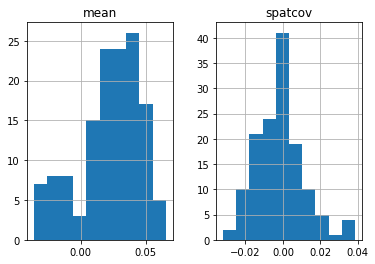

In [6]:
stats.loc['trend'].unstack(-1).hist()

The largest (standardized) trends seem to be in the mean, and are predominantly positive. Spatcov is distributed around zero. Because trend is largest in the mean, and because all series are scaled, also the intercept is largest for the mean series.

### Statistics of response variable

In [7]:
respstats = preds.apply(get_timeserie_properties, axis = 0)
respstats.columns = respstats.columns.droplevel([0,2])
respstats_unscaled = preds.apply(get_timeserie_properties, axis = 0, **dict(scale_trend_intercept = False))
respstats_unscaled.columns = respstats_unscaled.columns.droplevel([0,2])

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging betw

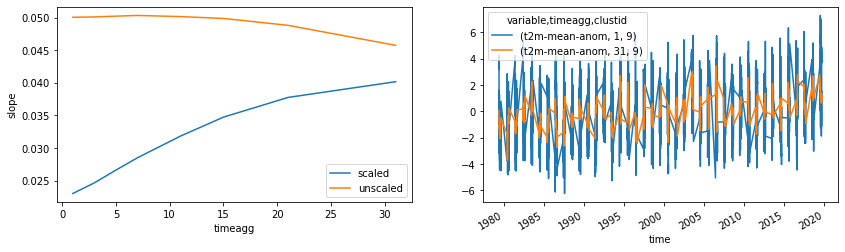

In [8]:
fig, axes = plt.subplots(ncols = 2, figsize = (14, 4))
respstats.loc['trend'].plot(ax = axes[0], label = 'scaled')
respstats_unscaled.loc['trend'].plot(label = 'unscaled', ax = axes[0])
axes[0].set_ylabel('slope')
axes[0].legend()
preds.loc[:,(slice(None),[1,31])].plot( ax = axes[1])
plt.show()

It seems to be the scaling that changes the sign of the slope. 31 day timeseries has of course a much lower standard deviation, divided by it, the series becomes relatively. This means that there is a trend signal in daily extremes, giving it a higher std and a lower scaled trend.

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/sklearn/preprocessing/_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging betw

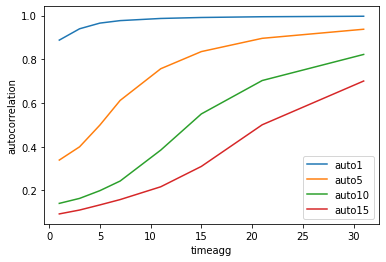

In [7]:
respstats = preds.apply(get_timeserie_properties, axis = 0, **dict(auto_corr_at = [1,5,10,15]))
respstats.columns = respstats.columns.droplevel([0,2])
respstats.loc[['auto1','auto5','auto10','auto15']].T.plot()
plt.ylabel('autocorrelation')
plt.show()

### Importance of spatcov vs mean
Later on we distinguish between timescales. We want to train one model per separation. One per timescale.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.signal import detrend

In [5]:
def single_pass_forward_permute(classifier, data_in, data_out, scores = [r2_score, mean_squared_error, mean_absolute_error], scorenames = ['r2','mse','mae']):
    """
    Function that takes in a fitted regressor/classifier. Data in are X and data out is y. 
    Returns a dataframe with the columns of data_in (predictors) as index, and scores in the columns
    """
    outcomes = pd.DataFrame(index = data_in.columns, columns = pd.Index(scorenames,name = 'score'), dtype = 'float64')
    for variable in data_in.columns:
        temp = data_in.copy() # Make sure that we are not overwriting by reference
        temp[variable] = temp[variable].sample(n = len(temp), replace = False).values
        prediction = classifier.predict(X = temp) # Prediction for positive, which is lightning
        outcomes.loc[variable] = [score(data_out, prediction) for score in scores]
    # Add the reference forecast:
    prediction = classifier.predict(X = data_in)
    outcomes.loc[('reference',)] = [score(data_out, prediction) for score in scores]
    return outcomes

In [6]:
# Training & importance only on the summer data, full set. No train-test splits
def fit_and_importance(prec_timeaggs = 1, separations = 0, resp_timeagg = 1, detrend_resp = False):
    """
    Possible to supply lists of integers for prec_timeaggs and separations.
    Throws away nans (in practice: data before 1981)
    """
    X = precs.loc[precs.index.month.map(lambda m: m in [6,7,8]),(slice(None),prec_timeaggs,slice(None),separations, slice(None))]
    X = X.dropna()
    y = preds.loc[preds.index.month.map(lambda m: m in [6,7,8]), (slice(None),resp_timeagg,slice(None))]
    y = y.loc[X.index]
    if detrend_resp:
        y = pd.DataFrame(detrend(y, axis = 0), index = y.index, columns = y.columns)
    regr_forest = RandomForestRegressor(min_samples_leaf = 200)
    regr_forest.fit(X = X, y = y.values.ravel())
    builtin_imp = pd.Series(regr_forest.feature_importances_, index = X.columns, name = 'builtin')
    permute_imp = single_pass_forward_permute(regr_forest, X, y.values.ravel())
    return permute_imp.join(builtin_imp, how = 'outer')

def fit(prec_timeaggs = 1, separations = 0, resp_timeagg = 1, detrend_resp = False):
    """
    Same as above, but not importance. Just returns the fitted object, Xin and yin
    """
    X = precs.loc[precs.index.month.map(lambda m: m in [6,7,8]),(slice(None),prec_timeaggs,slice(None),separations, slice(None))]
    X = X.dropna()
    y = preds.loc[preds.index.month.map(lambda m: m in [6,7,8]), (slice(None),resp_timeagg,slice(None))]
    y = y.loc[X.index]
    if detrend_resp:
        y = pd.DataFrame(detrend(y, axis = 0), index = y.index, columns = y.columns)
    regr_forest = RandomForestRegressor(min_samples_leaf = 200)
    regr_forest.fit(X = X, y = y.values.ravel())
    return(regr_forest, X, y)

In [8]:
test = fit_and_importance()
test_det = fit_and_importance(detrend_resp=True)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [9]:
test_det

r2       mse  \
variable      timeagg lag separation clustid metric                        
reference                                             0.675628  1.420381   
sst_nhplus    1       -1  0          0       mean     0.675628  1.420381   
                                             spatcov  0.675628  1.420381   
                                     1       mean     0.675561  1.420675   
                                             spatcov  0.675628  1.420381   
                                     2       mean     0.675413  1.421322   
                                             spatcov  0.674941  1.423388   
                                     3       mean     0.675248  1.422043   
                                             spatcov  0.675584  1.420575   
                                     4       mean     0.675628  1.420381   
                                             spatcov  0.675628  1.420381   
swvl13_europe 1       -1  0          0       mean     0.675363  1.421542   
                                             spatcov  0.674205  1.426614   
                                     1       mean     0.675628  1.420381   
                                             spatcov  0.672922  1.432231   
z300_nhnorm   1       -1  0          0       mean     0.673570  1.429394   
                                             spatcov -0.616746  7.079510   

                                                           mae   builtin  
variable      timeagg lag separation clustid metric                       
reference                                             0.950663       NaN  
sst_nhplus    1       -1  0          0       mean     0.950663  0.000000  
                                             spatcov  0.950663  0.000000  
                                     1       mean     0.950840  0.000089  
                                             spatcov  0.950663  0.000000  
                                     2       mean     0.951050  0.000194  
                                             spatcov  0.951543  0.000575  
                                     3       mean     0.951302  0.000400  
                                             spatcov  0.950733  0.000034  
                                     4       mean     0.950663  0.000000  
                                             spatcov  0.950663  0.000000  
swvl13_europe 1       -1  0          0       mean     0.951164  0.000239  
                                             spatcov  0.952548  0.001104  
                                     1       mean     0.950663  0.000000  
                                             spatcov  0.955533  0.002805  
z300_nhnorm   1       -1  0          0       mean     0.953345  0.001559  
                                             spatcov  2.161292  0.993002

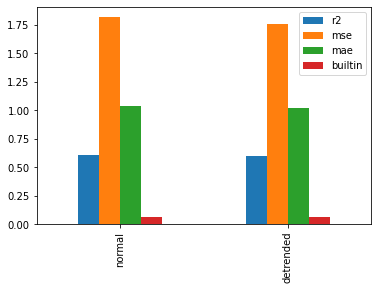

In [10]:
pd.concat([test.mean(axis = 0), test_det.mean(axis = 0)], keys = ['normal','detrended']).unstack(-1).plot.bar()

* From this small test you can first of all see that overall the random forest is just better at predicting the detrended response. (slightly higher r2 + lower mse)
* For spatcov vs mean you see that spatcov is always the better one.
* But then this small test is also very influenced by one dominant precursor. At this timeagg = 1, separation = 0, you find that the spatial covariance with z300 is the only important predictor. It gets all the credit. And swvl13 cluster 
* It would be interesting to see whether spatcov vs mean also holds for other scales and trended data.

In [11]:
multi_time_one_sep = fit_and_importance(prec_timeaggs=[1,7],separations=-6,resp_timeagg=3, detrend_resp=True)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [12]:
multi_time_one_sep

r2       mse  \
variable      timeagg lag separation clustid metric                        
reference                                             0.220075  2.952035   
sst_nhplus    1       -7  -6         0       mean     0.219942  2.952537   
                                             spatcov  0.159202  3.182442   
                                     1       mean     0.218854  2.956656   
                                             spatcov  0.219754  2.953248   
                                     2       mean     0.214436  2.973377   
                                             spatcov  0.219983  2.952384   
                                     3       mean     0.219934  2.952568   
                                             spatcov  0.218126  2.959412   
                                     4       mean     0.219135  2.955593   
                                             spatcov  0.220075  2.952035   
              7       -13 -6         0       mean     0.219840  2.952923   
                                             spatcov  0.217920  2.960191   
                                     1       mean     0.219866  2.952824   
                                             spatcov  0.186699  3.078363   
                                     2       mean     0.219934  2.952568   
                                             spatcov  0.219934  2.952568   
                                     3       mean     0.219906  2.952674   
                                             spatcov  0.213425  2.977203   
                                     4       mean     0.218885  2.956538   
                                             spatcov  0.216898  2.964059   
                                     5       mean     0.219518  2.954143   
                                             spatcov  0.218376  2.958465   
                                     6       mean     0.219870  2.952810   
                                             spatcov  0.218417  2.958311   
swvl13_europe 1       -7  -6         0       mean     0.219704  2.953438   
                                             spatcov  0.219028  2.955997   
                                     1       mean     0.219986  2.952370   
                                             spatcov  0.215626  2.968875   
                                     2       mean     0.219490  2.954250   
                                             spatcov  0.219416  2.954527   
                                     3       mean     0.210649  2.987711   
                                             spatcov  0.218520  2.957921   
              7       -13 -6         0       mean     0.220075  2.952035   
                                             spatcov  0.198052  3.035391   
                                     1       mean     0.218764  2.956996   
                                             spatcov  0.215399  2.969732   
                                     2       mean     0.219600  2.953833   
                                             spatcov  0.213627  2.976439   
z300_nhnorm   1       -7  -6         0       mean     0.218201  2.959126   
                                             spatcov  0.219708  2.953424   
                                     1       mean     0.220075  2.952035   
                                             spatcov  0.144230  3.239110   
              7       -13 -6         0       mean     0.219364  2.954724   
                                             spatcov  0.219488  2.954254   
                                     1       mean     0.215551  2.969158   
                                             spatcov  0.219966  2.952447   
                                     2       mean     0.210342  2.988872   
                                             spatcov  0.218063  2.959648   
                                     3       mean     0.218957  2.956267   
                                             spatcov  0.219055  2.955894   

                               

The above configuration gives an interesting result. For z300 and sst the biggest signal gains are at the shortest timescale. However, for swvl13 it is the greece cluster at 7 day aggregation that has most information. This makes me wonder if this changes when really trying to predict the heatwaves, like tmax. Also, the ordering/results are of course variable, dependent on the random fitting in the forest. In the end we are going to need splits.

In [8]:
def select_most_important(df, groups = ['variable','separation'], return_full = True):
    """
    Selecting the most important cluster/timescale per variable per separation. Usually the frame is already unique to one separation and its fitted model
    Returns either the full index or only (timeagg,clustid,metric). Returns that order for completeness.
    """
    order = ['timeagg','clustid','metric']
    levels = [ df.index.names.index(s) for s in order]
    keys = []
    results = []
    grouped = df.groupby(groups)
    for key, group in grouped:
        r2 = group.idxmin().loc[['r2']] # Lowest for r2
        mse_builtin = group.idxmax().loc[['mse','mae','builtin']] # Highest for the others
        most_important = pd.concat([r2,mse_builtin], axis = 0)
        keys.append(key)
        if not return_full: # Selecting from this series of tuples
            most_important = most_important.map(lambda x: tuple(np.array(x, dtype = 'object')[levels])) # Conversion to array as this allows multiple disjoint value
        results.append(most_important)
    return pd.concat(results, keys = keys, axis = 1).T, order

In [14]:
ret, _ = select_most_important(multi_time_one_sep.drop('reference'), groups = ['variable'], return_full=True)
ret2, _ = select_most_important(multi_time_one_sep.drop('reference'), groups = ['variable','timeagg'], return_full=True)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ret

,r2,mse,mae,builtin
sst_nhplus,"(sst_nhplus, 1, -7, -6, 0, spatcov)","(sst_nhplus, 1, -7, -6, 0, spatcov)","(sst_nhplus, 1, -7, -6, 0, spatcov)","(sst_nhplus, 1, -7, -6, 0, spatcov)"
swvl13_europe,"(swvl13_europe, 7, -13, -6, 0, spatcov)","(swvl13_europe, 7, -13, -6, 0, spatcov)","(swvl13_europe, 7, -13, -6, 0, spatcov)","(swvl13_europe, 7, -13, -6, 0, spatcov)"
z300_nhnorm,"(z300_nhnorm, 1, -7, -6, 1, spatcov)","(z300_nhnorm, 1, -7, -6, 1, spatcov)","(z300_nhnorm, 1, -7, -6, 1, spatcov)","(z300_nhnorm, 1, -7, -6, 1, spatcov)"


In [16]:
ret2

r2  \
sst_nhplus    1      (sst_nhplus, 1, -7, -6, 0, spatcov)   
              7     (sst_nhplus, 7, -13, -6, 1, spatcov)   
swvl13_europe 1      (swvl13_europe, 1, -7, -6, 3, mean)   
              7  (swvl13_europe, 7, -13, -6, 0, spatcov)   
z300_nhnorm   1     (z300_nhnorm, 1, -7, -6, 1, spatcov)   
              7       (z300_nhnorm, 7, -13, -6, 2, mean)   

                                                     mse  \
sst_nhplus    1      (sst_nhplus, 1, -7, -6, 0, spatcov)   
              7     (sst_nhplus, 7, -13, -6, 1, spatcov)   
swvl13_europe 1      (swvl13_europe, 1, -7, -6, 3, mean)   
              7  (swvl13_europe, 7, -13, -6, 0, spatcov)   
z300_nhnorm   1     (z300_nhnorm, 1, -7, -6, 1, spatcov)   
              7       (z300_nhnorm, 7, -13, -6, 2, mean)   

                                                     mae  \
sst_nhplus    1      (sst_nhplus, 1, -7, -6, 0, spatcov)   
              7     (sst_nhplus, 7, -13, -6, 1, spatcov)   
swvl13_europe 1      (swvl13_europe, 1, -7, -6, 3, mean)   
              7  (swvl13_europe, 7, -13, -6, 0, spatcov)   
z300_nhnorm   1     (z300_nhnorm, 1, -7, -6, 1, spatcov)   
              7       (z300_nhnorm, 7, -13, -6, 2, mean)   

                                                 builtin  
sst_nhplus    1      (sst_nhplus, 1, -7, -6, 0, spatcov)  
              7     (sst_nhplus, 7, -13, -6, 1, spatcov)  
swvl13_europe 1      (swvl13_europe, 1, -7, -6, 3, mean)  
              7  (swvl13_europe, 7, -13, -6, 0, spatcov)  
z300_nhnorm   1     (z300_nhnorm, 1, -7, -6, 1, spatcov)  
              7       (z300_nhnorm, 7, -13, -6, 2, mean)

When comparing the two tables above you still see dominance of spatcov. Except for when you select the suboptimal predictor of the 7 day regions in z300. But selecting at each separation, for each variable the best timescale and region, then everything is spatcov. Weirdly, when I look up the SSt clusters for both the timescales, these clustids are in the Indian Ocean.

Now let's see whether the same holds for a similar but trended scenario.

In [17]:
multi_time_one_sep_tr = fit_and_importance(prec_timeaggs=[1,7],separations=-6,resp_timeagg=3, detrend_resp=False)
ret_tr, _ = select_most_important(multi_time_one_sep_tr.drop('reference'), groups = ['variable'], return_full=True)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [18]:
print('trended reference skill \n',multi_time_one_sep_tr.loc['reference',['r2','mse','mae']])
print('detrended reference skill \n',multi_time_one_sep.loc['reference',['r2','mse','mae']])

trended reference skill 
                                              r2       mse       mae
timeagg lag separation clustid metric                              
                                       0.251797  3.034085  1.418523
detrended reference skill 
                                              r2       mse       mae
timeagg lag separation clustid metric                              
                                       0.220075  2.952035  1.408128


In [19]:
ret_tr

,r2,mse,mae,builtin
sst_nhplus,"(sst_nhplus, 1, -7, -6, 0, spatcov)","(sst_nhplus, 1, -7, -6, 0, spatcov)","(sst_nhplus, 1, -7, -6, 0, spatcov)","(sst_nhplus, 1, -7, -6, 0, spatcov)"
swvl13_europe,"(swvl13_europe, 7, -13, -6, 0, spatcov)","(swvl13_europe, 7, -13, -6, 0, spatcov)","(swvl13_europe, 7, -13, -6, 0, spatcov)","(swvl13_europe, 7, -13, -6, 0, spatcov)"
z300_nhnorm,"(z300_nhnorm, 1, -7, -6, 1, spatcov)","(z300_nhnorm, 1, -7, -6, 1, spatcov)","(z300_nhnorm, 1, -7, -6, 1, spatcov)","(z300_nhnorm, 1, -7, -6, 1, spatcov)"


Exactly the same important regions. Also here skill is slightly lower for when the model predicts the trended version. MSE and MAE are higher (Random forest learning the trend leaves less room to use other information probably). However, in the trended version a part of the total Sum-of-Squares is given by the linear increase. Therefore the explained variance (r2) is slightly larger.

### Ordering of timescales at separation 19
Does SST and soilm also do something interesting here?

In [35]:
sep19 = fit_and_importance(prec_timeaggs=[1,7,30],separations=-19,resp_timeagg=7, detrend_resp=True)
sep19_imp, _ = select_most_important(sep19.drop('reference'), groups = ['variable'], return_full=True)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [36]:
sep19_imp

,r2,mse,mae,builtin
sst_nhplus,"(sst_nhplus, 7, -26, -19, 0, spatcov)","(sst_nhplus, 7, -26, -19, 0, spatcov)","(sst_nhplus, 7, -26, -19, 0, spatcov)","(sst_nhplus, 7, -26, -19, 0, spatcov)"
swvl13_europe,"(swvl13_europe, 7, -26, -19, 1, spatcov)","(swvl13_europe, 7, -26, -19, 1, spatcov)","(swvl13_europe, 7, -26, -19, 1, spatcov)","(swvl13_europe, 7, -26, -19, 1, spatcov)"
z300_nhnorm,"(z300_nhnorm, 7, -26, -19, 0, spatcov)","(z300_nhnorm, 7, -26, -19, 0, spatcov)","(z300_nhnorm, 7, -26, -19, 0, spatcov)","(z300_nhnorm, 7, -26, -19, 0, spatcov)"


Something similar seems to be happening at this separation. The important sst region is spatcov in the indian ocean. This does not change when changing reponseagg to 30. swvl_13 is the iberean_island_7 for responseagg 7, but becomes turkey_30 for responseagg 30. 

### Dependence of best timescales and skill on response timescale

In [49]:
#visualize skill vs reponse timeagg. Giving the forest access to all predictor timescales.
# Perhaps different lines for different separations?
resptimeaggs = preds.columns.get_level_values('timeagg')
separations = np.unique(precs.columns.get_level_values('separation'))

referenceskills = []
for separation in separations:
    for resptimeagg in resptimeaggs:
        skill = fit_and_importance(prec_timeaggs=slice(None),separations=separation,resp_timeagg=resptimeagg, detrend_resp=True).loc[('reference',),]
        skill.index = pd.MultiIndex.from_tuples([(resptimeagg,separation),], names = ['resptimeagg','separation'])
        referenceskills.append(skill)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/c

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/c

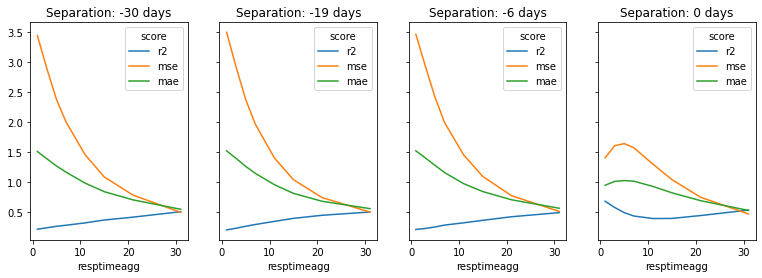

In [52]:
skills = pd.concat(referenceskills, axis = 0)
skills.columns.names = ['score']
skills = skills.unstack(-1)
fig, axes = plt.subplots(ncols = len(separations), figsize = (13,4), sharey = True)
for index, separation in enumerate(separations):
    plotframe = skills.loc[:,(slice(None),separation)].drop('builtin', axis = 1)
    plotframe.columns = plotframe.columns.droplevel('separation')
    plotframe.plot(ax = axes[index], title = f'Separation: {separation} days')
    

* This is quite interesting. Generally predictive skill increases with increased timeagg, for a given separation. Of course variability decreases with larger resptimeagg, perhaps therefore the signal is easier? It will not be the easier climate change signal at the larger timescales, as the response is detrended. Another reason could be is that in terms of multiple of the timescales it becomes less and less.. 
* For the latter statement it would be good to check if also the 30 day inputs are used for 30 day reponses.
* For the directly adjacent periods something else shows. I wonder whether the sub-optimal bump is due to hyperparameter optimization of the forest to a certain timescale? Or is it actually that the chaotic nature of the atmosphere dominates most at that timescale of +-5 days according mse/mae and +- 12 days according r2.
* Maurice was concerned that the three left ones are the same graph, but they are not, slight numeric differences.

In [9]:
# Visualize the prec-timescale chosen against the resptimescale? 
# Probably more noisy. There are only 3 prectimescales to choose from
#np.unique(precs.columns.get_level_values('timeagg'))
resptimeaggs = preds.columns.get_level_values('timeagg')
separations = np.unique(precs.columns.get_level_values('separation'))

bestprecs = []
for separation in separations:
    for resptimeagg in resptimeaggs:
        importances = fit_and_importance(prec_timeaggs=slice(None),separations=separation,resp_timeagg=resptimeagg, detrend_resp=True)
        bestprec, order = select_most_important(importances.drop('reference'), groups = 'variable', return_full=False)
        besttimescale = bestprec.applymap(lambda x: x[order.index('timeagg')])
        besttimescale.index = pd.MultiIndex.from_product([besttimescale.index,[resptimeagg],[separation]], names =['variable','resptimeagg','separation'])
        bestprecs.append(besttimescale)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: 

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: 

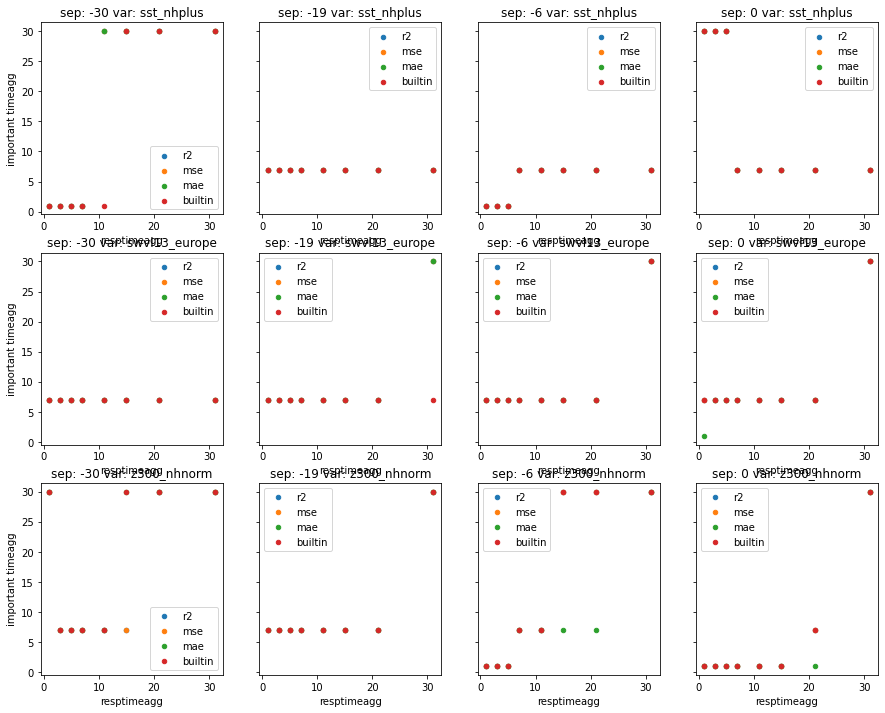

In [11]:
timescales = pd.concat(bestprecs, axis = 0)
timescales.columns.names = ['score']
variables = timescales.index.get_level_values('variable').unique()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig,axes = plt.subplots(ncols = len(separations), nrows = len(variables), figsize = (15,12),sharey= True)
for i,variable in enumerate(variables):
    for j,separation in enumerate(separations): # Will be columns
        plotframe = timescales.loc[(variable, slice(None),separation)]
        plotframe = plotframe.reset_index()
        for k, score in enumerate(['r2','mse','mae','builtin']):
            plotframe.plot.scatter(x = 'resptimeagg', y = score, ax = axes[i,j], label = score, color =colors[k])
        axes[i,j].set_ylabel('important timeagg')
        axes[i,j].legend()
        axes[i,j].set_title(f'sep: {separation} var: {variable}')

So one would expect that with increased response timeagg, also the larger timeagg precursors would be chosen, so that points would be on the diagonal. One also expects that with increasing separation the larger timeaggs would be chosen. Mean and spatcov are potentially mixed. This is what we see:

* I think that the behaviour of increased timescale choice with increased respnose timescale is most visible for the -6 separation.
* For z300 we indeed see that with shorter separation shorter timescales are chosen. Swvl is basically constant across everything. This might also say something about the unsuitability of the clustering at the other precursor timescales. (or if comparable regions, then the signal is certainly at the 7day timescale).

Change this to not only the most important predictor, but do all scales / clustids per model per variable per separation and link alpha to importance. (normalize this? and how to deal with maxima e.g. for MSE)

In [36]:
# Visualize all predictors. Scale the importances to alpha
def importance_scaler(series):
    """
    Min max scaling. Standard (max gets one) for builtin, mse and mae. But reverse for r2
    """
    if series.name == 'r2':
        return (series - series.max())/(series.min() - series.max())
    else:
        return (series - series.min())/(series.max() - series.min())

resptimeaggs = preds.columns.get_level_values('timeagg')
separations = np.unique(precs.columns.get_level_values('separation'))

allprecs = []
for separation in separations:
    for resptimeagg in resptimeaggs:
        importances = fit_and_importance(prec_timeaggs=slice(None),separations=separation,resp_timeagg=resptimeagg, detrend_resp=True)
        importances = importances.drop('reference').apply(importance_scaler, axis = 0)
        importances.reset_index('timeagg', inplace = True)
        importances.index = importances.index.droplevel('lag')
        importances['resptimeagg'] = resptimeagg
        allprecs.append(importances)

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: 

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: 

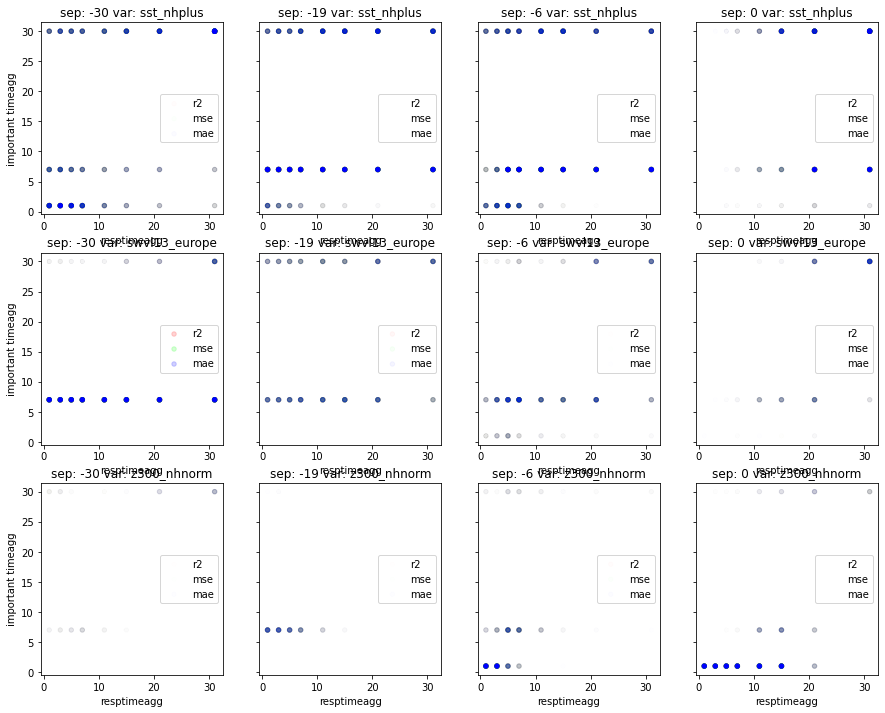

In [53]:
# Let's first graph everything according to spatcov
timescales = pd.concat(allprecs, axis = 0)
variables = timescales.index.get_level_values('variable').unique()
metric = slice(None) #'spatcov'
scores = ['r2','mse','mae'] # ['r2']

#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig,axes = plt.subplots(ncols = len(separations), nrows = len(variables), figsize = (15,12),sharey= True)
for i,variable in enumerate(variables):
    for j,separation in enumerate(separations): # Will be columns
        plotframe = timescales.loc[(variable,separation,slice(None),metric)]
        for k, score in enumerate(scores):
            rgba_colors = np.zeros((len(plotframe),4),dtype = 'float64')
            rgba_colors[:,k] = 1
            rgba_colors[:,-1] = plotframe[score]
            plotframe.plot.scatter(x = 'resptimeagg', y = 'timeagg', ax = axes[i,j], label = score, color =rgba_colors)
        axes[i,j].set_ylabel('important timeagg')
        axes[i,j].legend()
        axes[i,j].set_title(f'sep: {separation} var: {variable}')

This is a pretty good visualization, especially now also the variables have importances proportional to each other. 
* Z300 is clearly less important the further back you go. And with small separations you want the daily one.
* I think you see SST become more prominent the further back. Also I believe you find a bit of a progression of the 7-day-timescale precursor. Low sep only high respagg importance (further in the future), middle sep always important, high sep: only short timescales, window of opp almost passed. Might say something about the time period in which this precursor affects things. Teleconnection?
* Swvl is just mostly 7 precursor timescale important (Noted previously)
* For me the role of response timeagg is not clear. Obviously skill becomes a bit higher (should not be climate change because removed that). Do I need denser points between 10 and 30? Cheap to produce?


### Skill as a function of time
Is the model tuned to a specific period. Is the predictability and the use of precursors linked to climate change. Perhaps later on approached by robust train-test splitting.

In [7]:
forest, X_in, y_in = fit(prec_timeaggs=slice(None),separations=0,resp_timeagg=3, detrend_resp=True)

In [8]:
y_squared_diff = pd.Series((forest.predict(X_in) - y_in.values.ravel())**2, index = y_in.index)

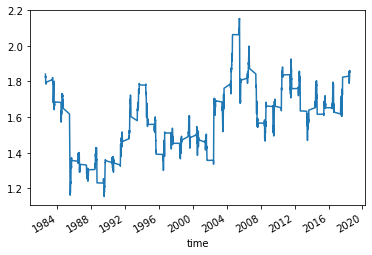

In [9]:
y_squared_diff.rolling(300,center = True).mean().plot() # Very crude, actually wraps around years

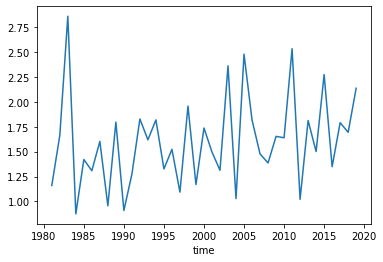

In [11]:
y_squared_diff.groupby(y_squared_diff.index.year).mean().plot() # THis is per year. As expected highly variable skill.

One could call this a bit of a trend, tending towards higher error in predicting near the end. Although not including the start years. Lets check whether not detrending (forest learning the climate trend) does something, as it could be that the detrending creates an unlearnable signal when the trend is non-linear.

In [12]:
forest, X_in, y_in = fit(prec_timeaggs=slice(None),separations=0,resp_timeagg=3, detrend_resp=False)

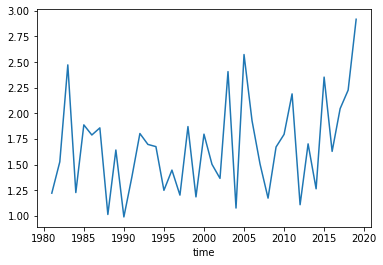

In [13]:
y_squared_diff = pd.Series((forest.predict(X_in) - y_in.values.ravel())**2, index = y_in.index)
y_squared_diff.groupby(y_squared_diff.index.year).mean().plot() # Mean value here is probably larger. Squared difference is pretty intense

In [38]:
# Train a good RandomForest
# Check if we can do hyperparameter optimization.
from sklearn.model_selection import KFold
leaf_sizes = np.arange(1,800,20)
n_folds = 8
results = xr.DataArray(np.empty((len(leaf_sizes),n_folds,2)), dims = ('leaf_size','fold','metric'), coords = dict(leaf_size = leaf_sizes, fold = np.arange(n_folds),metric = ['r2','mse']))
for ind, alpha in enumerate(leaf_sizes):
    kf = KFold(n_splits=n_folds)
    k = 0
    for train_index, val_index in kf.split(X):
        X_t_fold, X_v_fold = X.iloc[train_index], X.iloc[val_index]
        y_t_fold, y_v_fold = y_det.iloc[train_index], y_det.iloc[val_index]
        regr = RandomForestRegressor(min_samples_leaf = alpha)
        regr.fit(X_t_fold,y_t_fold)
        predictions = regr.predict(X_v_fold)
        r2 = r2_score(y_v_fold, predictions)
        mse = mean_squared_error(y_v_fold, predictions)
        results[ind,k,:] = [r2, mse]
        k += 1

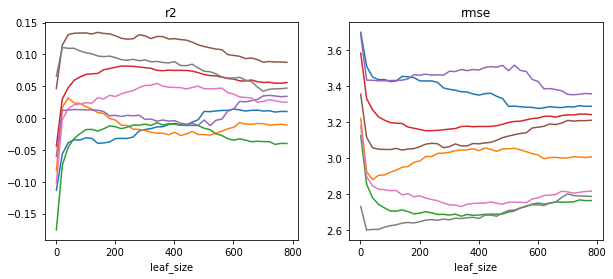

In [39]:
df = results.to_dataframe(name = 'score').unstack([1,2])
df.columns = df.columns.droplevel(0)
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize = (10,4))
df.loc[:,(slice(None),'r2')].plot(ax = ax1, legend = False, title = 'r2')
df.loc[:,(slice(None),'mse')].plot(ax = ax2, legend = False, title = 'rmse')

In [31]:
# So the model should have leaf_size = 200

regr_forest = RandomForestRegressor(min_samples_leaf = 200)
regr_forest.fit(X = X, y = y)

def single_pass_forward_permute(classifier, data_in, data_out, scores = [r2_score, mean_squared_error], scorenames = ['r2','mse']):
    outcomes = pd.DataFrame(index = data_in.columns, columns = pd.Index(scorenames,name = 'score'))
    for variable in data_in.columns:
        temp = data_in.copy() # Make sure that we are not overwriting by reference
        temp[variable] = temp[variable].sample(n = len(temp), replace = False).values
        prediction = classifier.predict(X = temp) # Prediction for positive, which is lightning
        outcomes.loc[variable] = [score(data_out, prediction) for score in scores]
    # Add the reference forecast:
    prediction = classifier.predict(X = data_in)
    outcomes.loc['reference'] = [score(data_out, prediction) for score in scores]
    return outcomes
train_perm = single_pass_forward_permute(regr_forest, X, y)

In [37]:
train_perm

score,r2,mse
"(z300_nhmin, 1, -7, 0)",0.101883,3.19245
"(z300_nhmin, 1, -7, 1)",-0.035663,3.68137
"(z300_nhmin, 1, -7, 2)",0.100565,3.19713
"(z300_nhmin, 1, -7, 3)",0.0659045,3.32033
reference,0.103219,3.18769
